In [1]:
import numpy as np
import bisect

from matplotlib import pyplot as plt

In [2]:
from pixel2d import Pixel2D

In [3]:
from topologicalunionfind import TopologicalUnionFind

### Reading Slice

In [4]:
binary = np.fromfile('../cube/map.bin')
binary.shape

(87464,)

In [5]:
cube_shape = (26, 29, 116)

In [6]:
cube = binary.reshape(cube_shape)
cube.shape

(26, 29, 116)

In [7]:
aslice = cube[:,:,60]
aslice.shape

(26, 29)

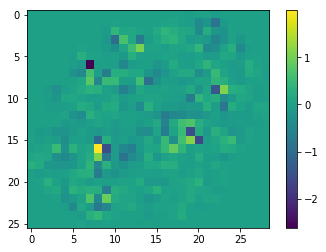

In [8]:
plt.imshow(aslice)
plt.colorbar()
plt.show()

In [9]:
bslice = (aslice == 0) * 1
bslice.shape

(26, 29)

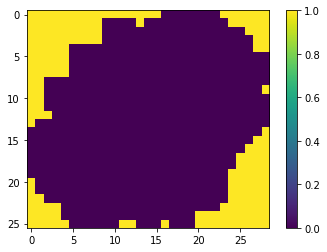

In [10]:
plt.imshow(bslice)
plt.colorbar()
plt.show()

### Getting Data

In [11]:
reverse = True
diagonal = False

In [12]:
if reverse:
    dataUF = aslice.max() - aslice + 1
    dataPH = aslice.max() - aslice + 1
else:
    dataUF = aslice
    dataPH = aslice - aslice.min() + 1

### Generating Input File

In [13]:
if dataPH.dtype == np.float_:
    multiplier = 1e6
else:
    multiplier = 1

In [14]:
dataPH = (dataPH * multiplier).astype(int)

In [15]:
if reverse: 
    if diagonal:
        ainput = 'slice2dr.txt'
    else:
        ainput = 'slice2dr2.txt'
else:
    if diagonal:
        ainput = 'slice2d.txt'
    else:
        ainput = 'slice2d2.txt'

In [16]:
if diagonal:
    with open(ainput, 'w') as f:
        f.write(str(len(dataPH.shape))+'\n')
        for l in dataPH.shape:
            f.write(str(l)+'\n')
        for i in dataPH.flatten():
            f.write(str(i)+'\n')

In [18]:
if not diagonal:
    with open(ainput, 'w') as f:
        f.write(str(len(dataPH.shape))+'\n')
        for i in range(0, dataPH.shape[0]):
            for j in range(0, dataPH.shape[1]):
                f.write('0 {} {} {}\n'.format(i, j, dataPH[i, j]))
                if i+1<dataPH.shape[0]:
                    f.write('1 {} {} {} {} {}\n'.format(i, j, i+1, j, max(dataPH[i, j], dataPH[i+1, j])))
                if j+1<dataPH.shape[1]:
                    f.write('1 {} {} {} {} {}\n'.format(i, j, i, j+1, max(dataPH[i, j], dataPH[i, j+1])))

### Running Cubical

In [19]:
import subprocess

In [20]:
if diagonal:
    subprocess.run(['./perseusMac', 'cubtop', ainput, ainput[:-4]])
else:
    subprocess.run(['./perseusMac', 'nmfsimtop', ainput, ainput[:-4]])

### Reading Output File for Cubical

In [21]:
if reverse: 
    if diagonal:
        aoutput = 'slice2dr_0.txt'
    else:
        aoutput = 'slice2dr2_0.txt'
else:
    if diagonal:
        aoutput = 'slice2d_0.txt'
    else:
        aoutput = 'slice2d2_0.txt'

In [22]:
pd2 = []
with open(aoutput) as f:
    for l in f.readlines():
        info = l.split()
        start = int(info[0]) / multiplier
        end = int(info[1]) / multiplier if int(info[1]) != -1 else -1
        pd2.append((start, end))
pd2 = sorted(pd2, key=lambda x:x[0])
pd2

[(1.0, -1),
 (1.85258, 3.012406),
 (1.891496, 3.00869),
 (1.927618, 2.955203),
 (2.079405, 2.981651),
 (2.106167, 2.592759),
 (2.181681, 2.995875),
 (2.262395, 2.865681),
 (2.27371, 2.476872),
 (2.335517, 2.861019),
 (2.413584, 2.979966),
 (2.47912, 2.869261),
 (2.492496, 2.974834),
 (2.510653, 2.995875),
 (2.527763, 2.712478),
 (2.530028, 2.530973),
 (2.555434, 2.949689),
 (2.575539, 2.962095),
 (2.577509, 2.887387),
 (2.578709, 2.934329),
 (2.589951, 2.949172),
 (2.591252, 2.75767),
 (2.608692, 2.887017),
 (2.623652, 2.717016),
 (2.648552, 2.767839),
 (2.652692, 2.956466),
 (2.657608, 2.957617),
 (2.662162, 2.979528),
 (2.680754, 2.995875),
 (2.682377, 2.873769),
 (2.682981, 2.921065),
 (2.684279, 2.945111),
 (2.685517, 2.970443),
 (2.688538, 3.100763),
 (2.697398, 2.884629),
 (2.709025, 2.995875),
 (2.721787, 3.023547),
 (2.722028, 2.995875),
 (2.727654, 2.871522),
 (2.734053, 2.871522),
 (2.737533, 2.859985),
 (2.744196, 2.765732),
 (2.746782, 2.991111),
 (2.750175, 2.849129),
 (2.

### Creating Pixel Objects

In [23]:
mat = []
for i in range(dataUF.shape[0]):
    row = []
    for j in range(dataUF.shape[1]):
        element = dataUF[i][j]
        row.append(Pixel2D(i, j, element))
    mat.append(row)

In [24]:
arr = sorted([e for row in mat for e in row])
arr

[Pixel: [coordinates: (16, 8); value: 1.0],
 Pixel: [coordinates: (15, 19); value: 1.8525808886801793],
 Pixel: [coordinates: (17, 8); value: 1.8890566366301476],
 Pixel: [coordinates: (9, 23); value: 1.891496257900952],
 Pixel: [coordinates: (4, 13); value: 1.9276188166121235],
 Pixel: [coordinates: (22, 9); value: 2.079405782757049],
 Pixel: [coordinates: (16, 17); value: 2.106167324614151],
 Pixel: [coordinates: (8, 7); value: 2.1816818626314998],
 Pixel: [coordinates: (22, 7); value: 2.2623951706104277],
 Pixel: [coordinates: (13, 19); value: 2.273710661662855],
 Pixel: [coordinates: (3, 11); value: 2.3355176474978445],
 Pixel: [coordinates: (7, 7); value: 2.3618400251196365],
 Pixel: [coordinates: (15, 18); value: 2.383249554016103],
 Pixel: [coordinates: (8, 13); value: 2.4135840021764046],
 Pixel: [coordinates: (13, 18); value: 2.4170670153961695],
 Pixel: [coordinates: (4, 12); value: 2.4561147004850055],
 Pixel: [coordinates: (14, 18); value: 2.4768728047909754],
 Pixel: [coor

### Getting Neighbors for a Pixel

In [25]:
def append2DNeighbor(neighbors, x, y):
    if x < 0 or y < 0:
        return
    try:
        neighbors.append(mat[x][y])
    except:
        pass

In [26]:
def get_neighbors(pixel, diagonal=False):
    neighbors = []
    x = pixel.getX()
    y = pixel.getY()
    append2DNeighbor(neighbors, x-1, y)
    append2DNeighbor(neighbors, x+1, y)
    append2DNeighbor(neighbors, x, y-1)
    append2DNeighbor(neighbors, x, y+1)
    if diagonal:
        append2DNeighbor(neighbors, x-1, y-1)
        append2DNeighbor(neighbors, x-1, y+1)
        append2DNeighbor(neighbors, x+1, y-1)
        append2DNeighbor(neighbors, x+1, y+1)
    return neighbors

In [27]:
set([len(get_neighbors(pixel)) for pixel in arr])

{2, 3, 4}

In [28]:
set([len(get_neighbors(pixel, True)) for pixel in arr])

{3, 5, 8}

### Creating Topological Union-find

In [29]:
tuf = TopologicalUnionFind()
tuf

<UnionFind:
	elts=[],
	siz=[],
	par=[],
n_elts=0,n_comps=0>

In [30]:
for pixel in arr:
    tuf.add(pixel, pixel.getV())
    for neighbor in get_neighbors(pixel, diagonal):
        tuf.union(pixel, neighbor, pixel.getV())

In [31]:
pd = tuf.persistence_diagram()
pd

[(Pixel: [coordinates: (16, 8); value: 1.0], 1.0, inf),
 (Pixel: [coordinates: (15, 19); value: 1.8525808886801793],
  1.8525808886801793,
  3.0124069233456408),
 (Pixel: [coordinates: (9, 23); value: 1.891496257900952],
  1.891496257900952,
  3.008690030053935),
 (Pixel: [coordinates: (4, 13); value: 1.9276188166121235],
  1.9276188166121235,
  2.955203473674464),
 (Pixel: [coordinates: (22, 9); value: 2.079405782757049],
  2.079405782757049,
  2.981651477115282),
 (Pixel: [coordinates: (16, 17); value: 2.106167324614151],
  2.106167324614151,
  2.5927595032106994),
 (Pixel: [coordinates: (8, 7); value: 2.1816818626314998],
  2.1816818626314998,
  2.995875491191871),
 (Pixel: [coordinates: (22, 7); value: 2.2623951706104277],
  2.2623951706104277,
  2.8656818711889365),
 (Pixel: [coordinates: (13, 19); value: 2.273710661662855],
  2.273710661662855,
  2.4768728047909754),
 (Pixel: [coordinates: (3, 11); value: 2.3355176474978445],
  2.3355176474978445,
  2.861019213079299),
 (Pixel: [

### Visualization

In [32]:
y = np.arange(0, len(pd))

In [33]:
if reverse:
    xmin = [aslice.min() if np.isinf(f[2]) else aslice.max() - f[2] + 1 for f in pd]
    xmax = [aslice.max() - f[1] + 1 for f in pd]
    xlim = (max(xmax), min(xmin))
else:
    xmin = [f[1] for f in pd]
    xmax = [aslice.max() if np.isinf(f[2]) else f[2] for f in pd]
    xlim = (min(xmin), max(xmax))

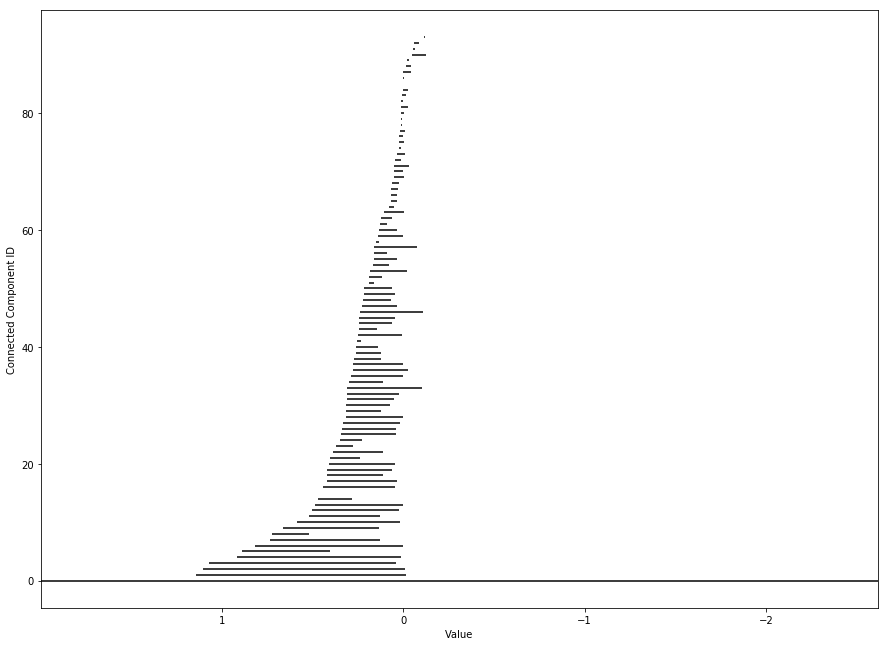

In [34]:
height = 2 + len(pd) // 10
plt.figure(figsize=(15,height))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.xlim(xlim[0], xlim[1])
plt.xlabel('Value')
plt.ylabel('Connected Component ID')
plt.show()

### Visualization2

In [35]:
y = np.arange(0, len(pd2))

In [36]:
if reverse:
    xmin = [aslice.min() if f[1] == -1 else aslice.max() - f[1] + 1 for f in pd2]
    xmax = [aslice.max() - f[0] + 1 for f in pd2]
    xlim = (max(xmax), min(xmin))
else:
    xmin = [f[0] + aslice.min() - 1 for f in pd2]
    xmax = [aslice.max() if f[1] == -1 else f[1] + aslice.min() - 1 for f in pd2]
    xlim = (min(xmin), max(xmax))

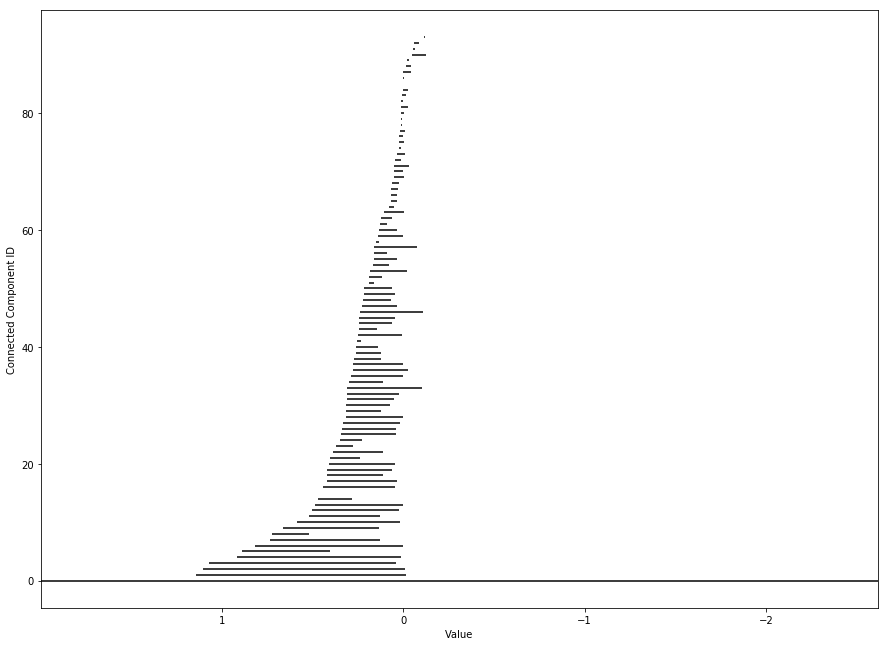

In [37]:
height = 2 + len(pd2) // 10
plt.figure(figsize=(15,height))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.xlim(xlim[0], xlim[1])
plt.xlabel('Value')
plt.ylabel('Connected Component ID')
plt.show()